<center>
<img src="https://avatars.mds.yandex.net/i?id=08831819d2b500822a90327ea7aee923ef8a5322-9154878-images-thumbs&n=13" height="250">

# Андан на экономе: домашнее задание 3
</center>




**ФИО:** Сысоева Кристина Валерьевна


In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

# Спрос на велосипеды

Здесь буду работать с данными о спросе на велосипеды, буду его предсказывать. 

In [2]:
df = pd.read_csv('bikes_rent.csv')
print(df.shape)
df.head( )

(731, 13)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


__Описание переменных:__

* `season`  1 - весна, 2 - лето, 3 - осень, 4 - зима
* `yr`  0 - 2011, 1 - 2012
* `mnth`  от 1 до 12
* `holiday`  0 - нет праздника, 1 - есть праздник
* `weekday`  от 0 до 6
* `workingday`  0 - нерабочий день, 1 - рабочий день
* `weathersit`  оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* `temp`  температура в Цельсиях
* `atemp`  температура по ощущениям в Цельсиях
* `hum`  влажность
* `windspeed(mph)`  скорость ветра в милях в час
* `windspeed(ms)`  скорость ветра в метрах в секунду
* `cnt`  количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

In [3]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_hat, y_train_hat):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_hat, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

## 1. EDA

__а) Проверяем есть ли в данных пропуски__

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df.isnull().sum()

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

__б) Составим список из категориальных переменных и список из действительных переменных.__

In [5]:
var_cat = df[['season', 'yr', 'holiday', 'workingday', 'weathersit', 'mnth', 'weekday']]

var_real = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']]

target = 'cnt'

__в) Нарисуем гистограмму для целевого признака. Исследуем выбросы__

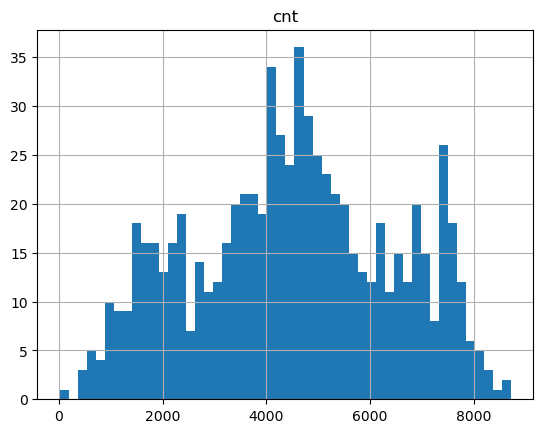

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df[[target]].hist(bins = 50);

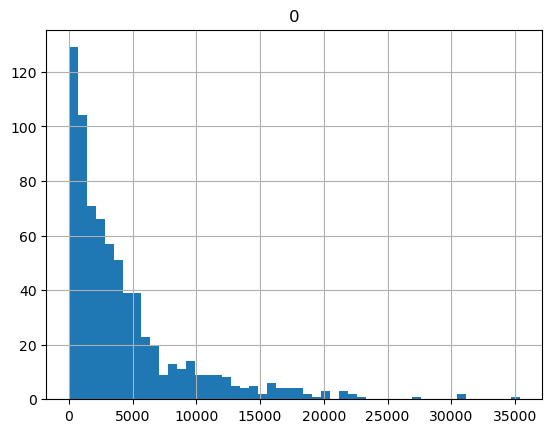

In [7]:
pd.DataFrame(np.random.exponential(df[[target]])).hist(bins = 50);

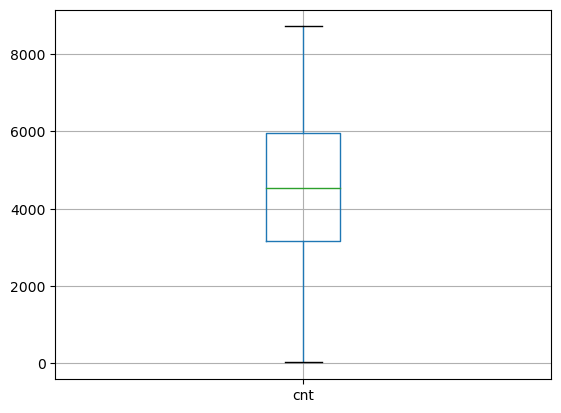

In [8]:
df[[target]].boxplot();

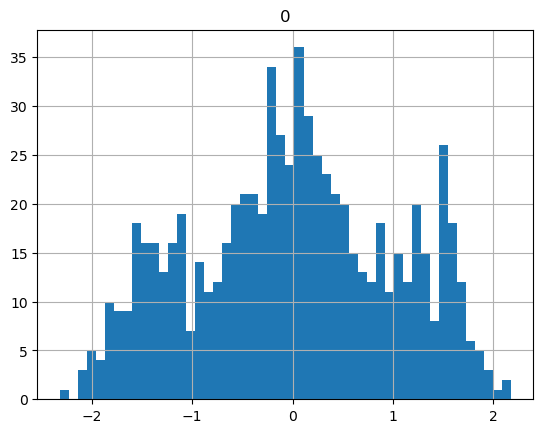

In [9]:
from sklearn.preprocessing import StandardScaler 
object= StandardScaler() 
pd.DataFrame(object.fit_transform(df[[target]])).hist(bins = 50);

__Ответ:__  Нет выбросов

__г) Посмотрим на то, как переменные коррелируют с таргетом. Для этого построим соответствующие облака рассеивания.__

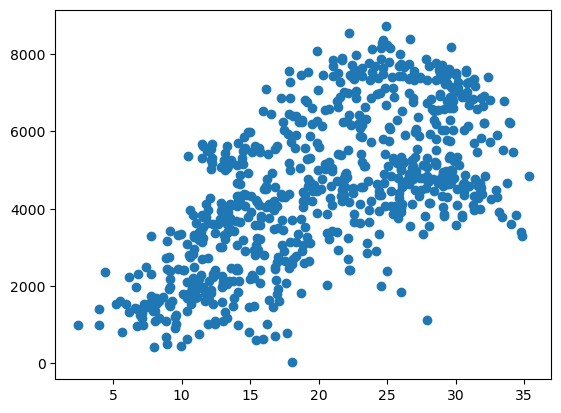

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
plt.scatter(df[['temp']], df[[target]]);

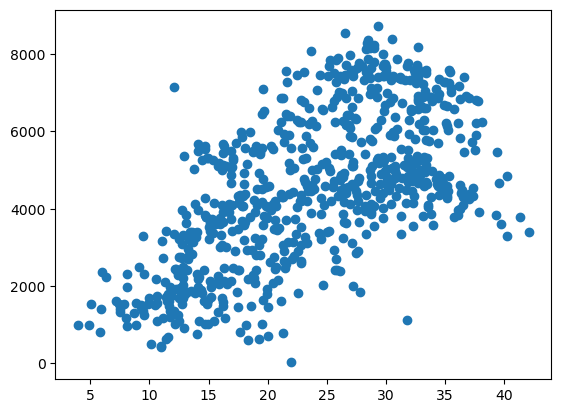

In [11]:
plt.scatter(df[['atemp']], df[[target]]);

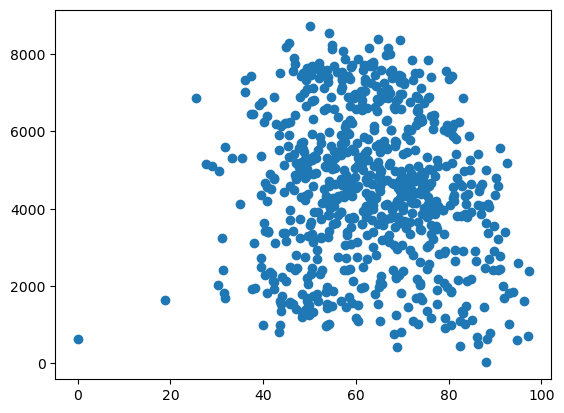

In [12]:
plt.scatter(df[['hum']], df[[target]]);

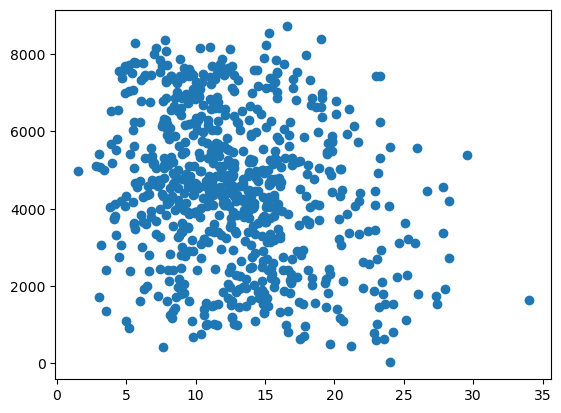

In [13]:
plt.scatter(df[['windspeed(mph)']], df[[target]]);

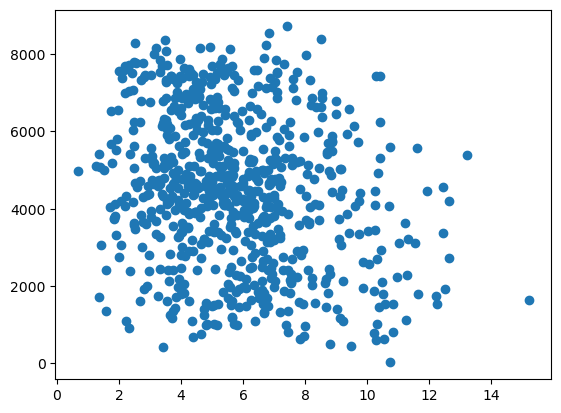

In [14]:
plt.scatter(df[['windspeed(ms)']], df[[target]]);

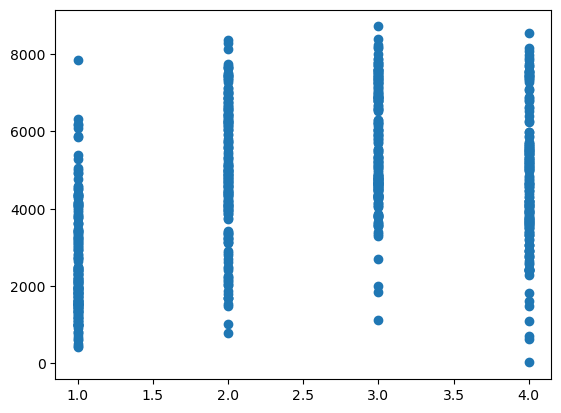

In [15]:
plt.scatter(df[['season']], df[[target]]);

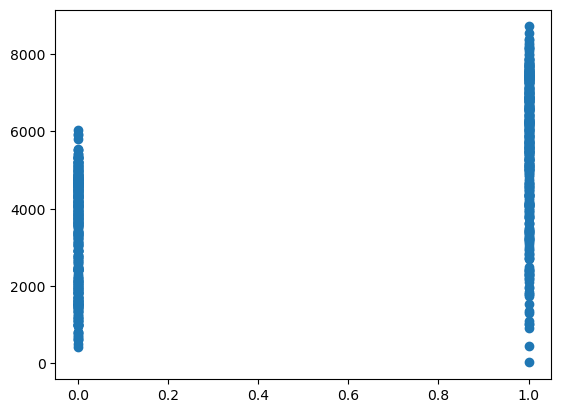

In [16]:
plt.scatter(df[['yr']], df[[target]]);

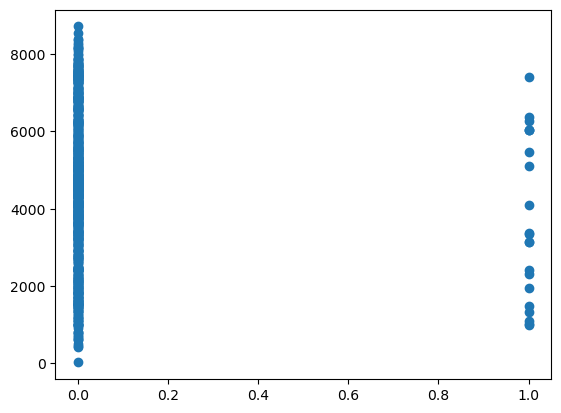

In [17]:
plt.scatter(df[['holiday']], df[[target]]);

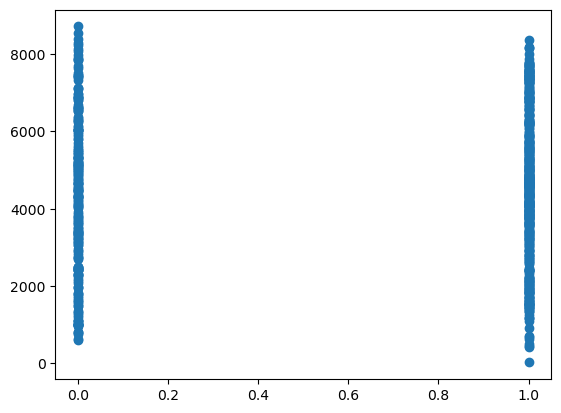

In [18]:
plt.scatter(df[['workingday']], df[[target]]);

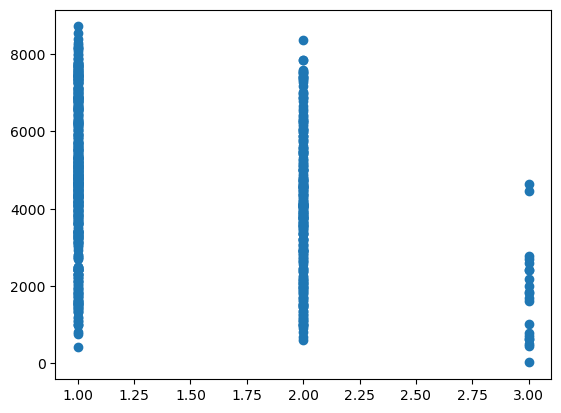

In [19]:
plt.scatter(df[['weathersit']], df[[target]]);

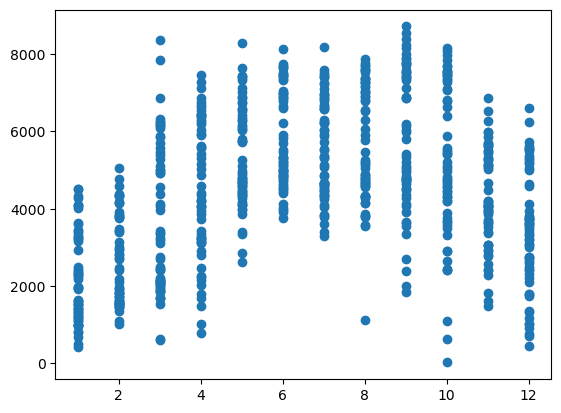

In [20]:
plt.scatter(df[['mnth']], df[[target]]);

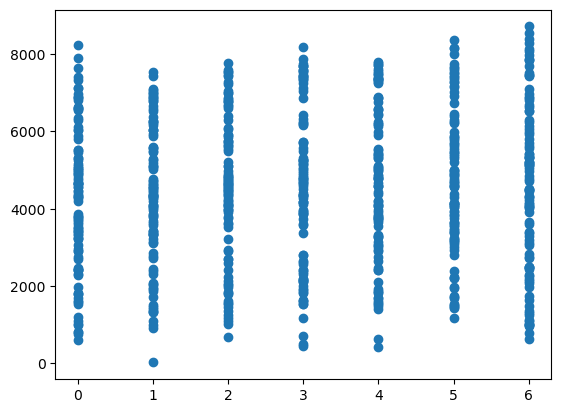

In [21]:
plt.scatter(df[['weekday']], df[[target]]);

__д) [5 баллов]__ Каков характер зависимости числа прокатов от месяца? От каких признаков спрос зависит линейно? 

__Ответ:__  Летом всегда спрос на велосипеды выше, чем в остальные времена года, зависимость в форме параболы. Спрос зависит линейно от температуры в Цельсиях и температуры по ощущениям в Цельсиях.

__е) [5 баллов]__ Постройте гистограммы для всех непрерывных переменных. Что можете сказать о выбросах? 

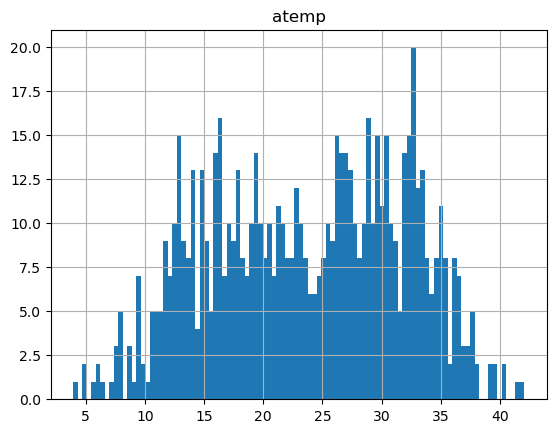

In [22]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you 
df[['atemp']].hist(bins = 100);

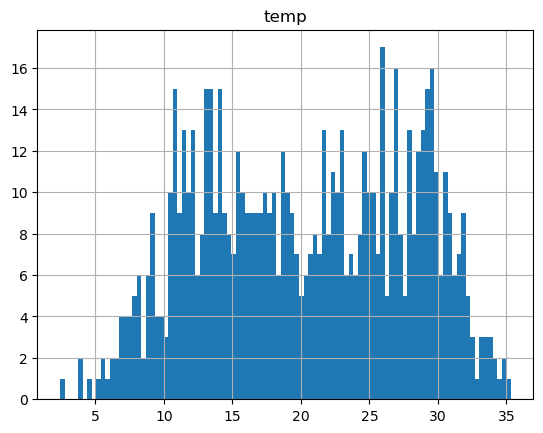

In [23]:
df[['temp']].hist(bins = 100);

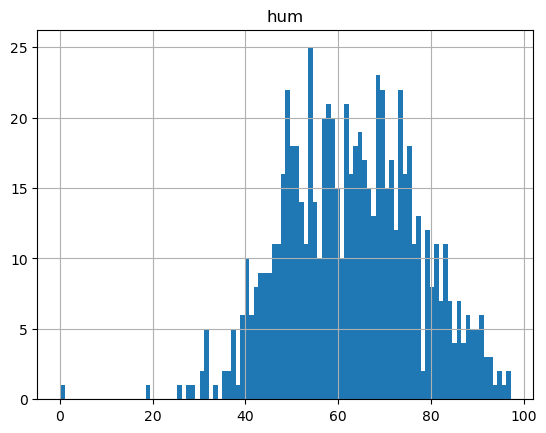

In [24]:
df[['hum']].hist(bins = 100);

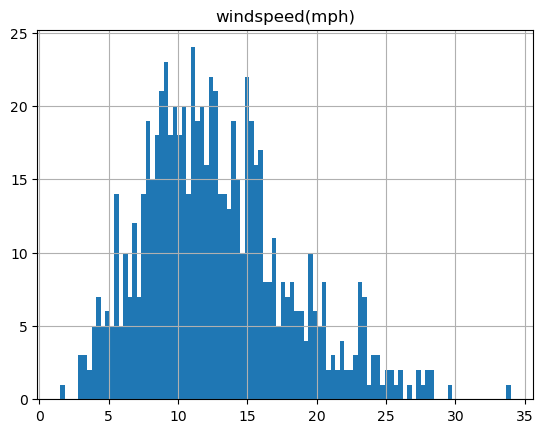

In [25]:
df[['windspeed(mph)']].hist(bins = 100);

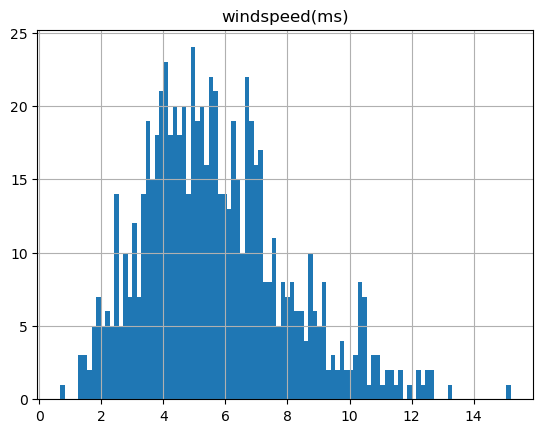

In [26]:
df[['windspeed(ms)']].hist(bins = 100);

Выбросы есть у каждой непрерывной переменной.

__ж) Построим между непрерывными признаками корреляционную матрицу и нарисуем её. Исследуем неинформативные признаки.__

In [27]:
X = df[target].tolist()
var_real_with_target = var_real.insert(loc = 0, column = target, value = X)
var_real_with_target

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
var_real.corr()

,cnt,temp,atemp,hum,windspeed(mph),windspeed(ms)
cnt,1.000000,0.627494,0.631066,-0.100659,-0.234545,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489,-0.248489
windspeed(mph),-0.234545,-0.157944,-0.183643,-0.248489,1.000000,1.000000
windspeed(ms),-0.234545,-0.157944,-0.183643,-0.248489,1.000000,1.000000


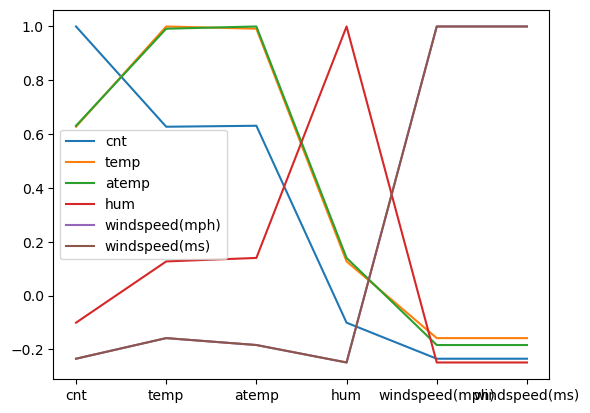

In [29]:
var_real.corr().plot();

__Ответ:__ Графики atemp и windspeed(mph), они повторяют графики temp и windspeed(ms) соответственно.

__з)  Построим для всех категориальных переменных _countplot_. Исследуем слишком обширные категории, в которых очень маленькие части нам придётся объединять в категорию "другое".__

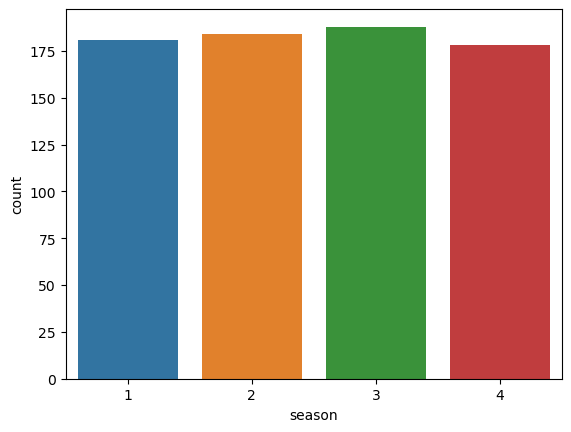

In [30]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
sns.countplot(df[['season']], x=df['season']);

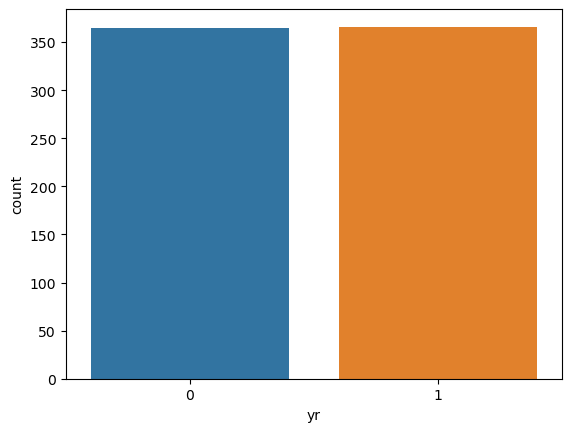

In [31]:
sns.countplot(df[['yr']], x=df['yr']);

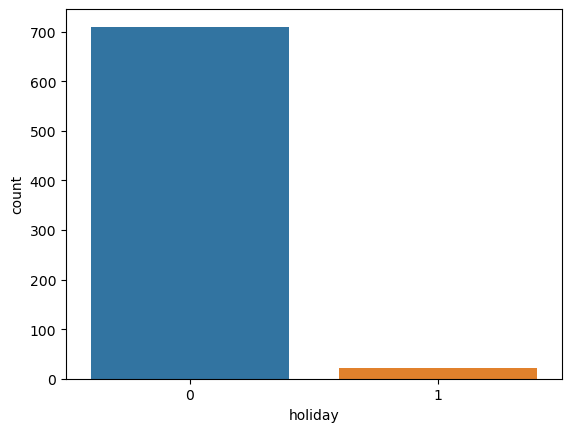

In [32]:
sns.countplot(df[['holiday']], x=df['holiday']);

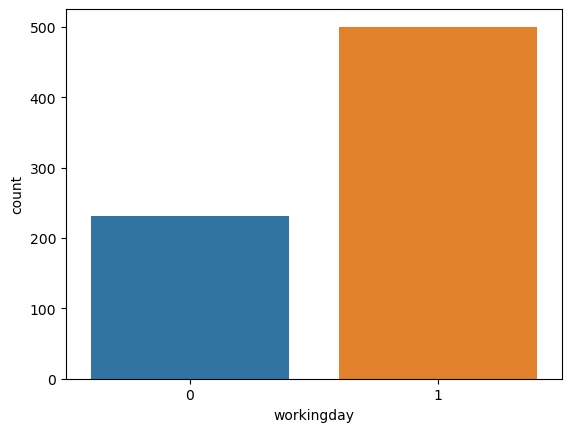

In [33]:
sns.countplot(df[['workingday']], x=df['workingday']);

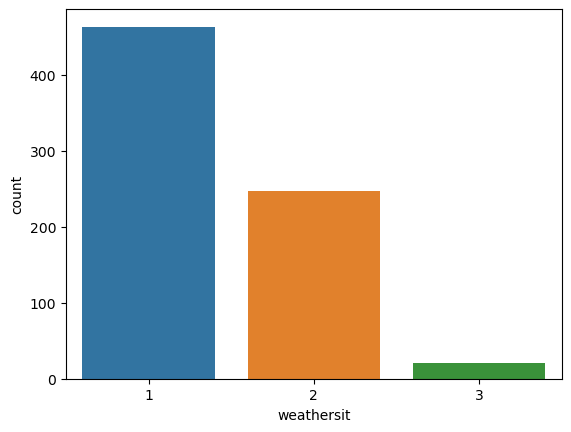

In [34]:
sns.countplot(df[['weathersit']], x=df['weathersit']);

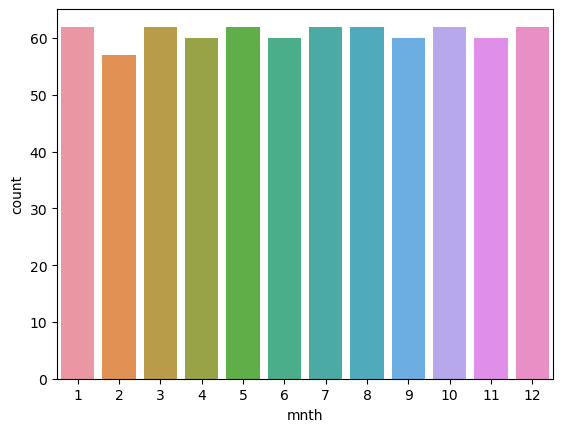

In [35]:
sns.countplot(df[['mnth']], x=df['mnth']);

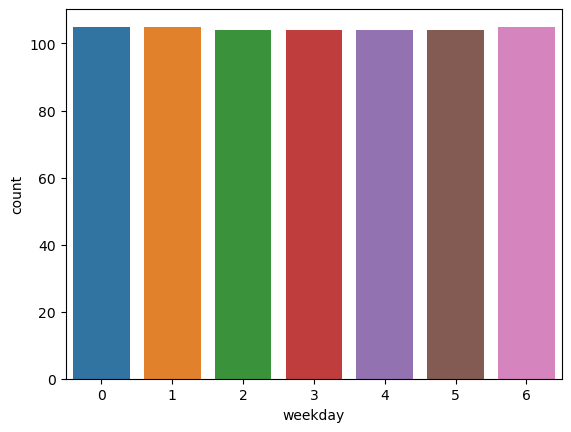

In [36]:
sns.countplot(df[['weekday']], x=df['weekday']);

__Ответ:__  Для holiday праздничные дни и неблагоприятные дни для weathersit стоит определить в категорию "другое", Распределение остальных признаков характеризуется выделением больших групп.

__и)  Сделаем OHE-кодирование.__

In [37]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
var_cat

,season,yr,holiday,workingday,weathersit,mnth,weekday
0,1,0,0,0,2,1,6
1,1,0,0,0,2,1,0
2,1,0,0,1,1,1,1
3,1,0,0,1,1,1,2
4,1,0,0,1,1,1,3
...,...,...,...,...,...,...,...
726,1,1,0,1,2,12,4
727,1,1,0,1,2,12,5
728,1,1,0,0,2,12,6
729,1,1,0,0,1,12,0


In [38]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse_output = False, drop = 'first')

encoded_cols = pd.DataFrame(onehotencoder.fit_transform(var_cat[var_cat.columns]))

feature_names = onehotencoder.get_feature_names_out(var_cat.columns)

encoded_cols.columns = feature_names 

encoded_cols

,season_2,season_3,season_4,yr_1,holiday_1,workingday_1,weathersit_2,weathersit_3,mnth_2,mnth_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
727,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
728,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
729,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
print("Size before OneHot:", var_real.shape)
print("Size after OneHot:", encoded_cols.shape)

Size before OneHot: (731, 6)
Size after OneHot: (731, 25)


In [40]:
df = var_real.join(encoded_cols)
df

,cnt,temp,atemp,hum,windspeed(mph),windspeed(ms),season_2,season_3,season_4,yr_1,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,985,14.110847,18.18125,80.5833,10.749882,4.805490,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,801,14.902598,17.68695,69.6087,16.652113,7.443949,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1349,8.050924,9.47025,43.7273,16.636703,7.437060,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1562,8.200000,10.60610,59.0435,10.739832,4.800998,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1600,9.305237,11.46350,43.6957,12.522300,5.597810,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2114,10.420847,11.33210,65.2917,23.458911,10.486773,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
727,3095,10.386653,12.75230,59.0000,10.416557,4.656485,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
728,1341,10.386653,12.12000,75.2917,8.333661,3.725374,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
729,1796,10.489153,11.58500,48.3333,23.500518,10.505372,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


__к)  Некоторые из наших переменных могут вносить в спрос на велики квадратичный вклад. Например, температура.__

__Сначала, когда температура возрастает, люди выходят кататься охотнее, а потом, когда становится жарко, спрос резко падает. Так возникает параболическая зависимость.__

__Создадим для каждой действительной переменной из данных дополнительную переменную: её квадрат.__

In [41]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
# пока 45 баллов
df['square cnt'] = df['cnt']**2
df['square temp'] = df['temp']**2
df['square atemp'] = df['atemp']**2
df['square hum'] = df['hum']**2
df['square windspeed(mph)'] = df['windspeed(mph)']**2
df['square windspeed(ms)'] = df['windspeed(ms)']**2
df

,cnt,temp,atemp,hum,windspeed(mph),windspeed(ms),season_2,season_3,season_4,yr_1,...,weekday_3,weekday_4,weekday_5,weekday_6,square cnt,square temp,square atemp,square hum,square windspeed(mph),square windspeed(ms)
0,985,14.110847,18.18125,80.5833,10.749882,4.805490,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,970225,199.116003,330.557852,6493.668239,115.559963,23.092738
1,801,14.902598,17.68695,69.6087,16.652113,7.443949,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,641601,222.087427,312.828200,4845.371116,277.292867,55.412371
2,1349,8.050924,9.47025,43.7273,16.636703,7.437060,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1819801,64.817377,89.685635,1912.076765,276.779887,55.309860
3,1562,8.200000,10.60610,59.0435,10.739832,4.800998,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2439844,67.240000,112.489357,3486.134892,115.343991,23.049580
4,1600,9.305237,11.46350,43.6957,12.522300,5.597810,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2560000,86.587436,131.411832,1909.314198,156.807997,31.335472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2114,10.420847,11.33210,65.2917,23.458911,10.486773,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,4468996,108.594052,128.416490,4263.006089,550.320505,109.972406
727,3095,10.386653,12.75230,59.0000,10.416557,4.656485,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,9579025,107.882561,162.621155,3481.000000,108.504660,21.682853
728,1341,10.386653,12.12000,75.2917,8.333661,3.725374,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1798281,107.882561,146.894400,5668.840089,69.449906,13.878409
729,1796,10.489153,11.58500,48.3333,23.500518,10.505372,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3225616,110.022331,134.212225,2336.107889,552.274346,110.362849


__л) Попробуем придумать ещё какую-нибудь новую фичу (дополнительную переменную) для прогнозирования. Опишем какая за фичёй стоит интуиция и почему это должно сработать при моделировании.__

In [42]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
import pandas as pd
import numpy as np

percentage_of_youth = pd.Series(np.random.randint(0, 100, size=732))
df['percentage of youth'] = percentage_of_youth

df

,cnt,temp,atemp,hum,windspeed(mph),windspeed(ms),season_2,season_3,season_4,yr_1,...,weekday_4,weekday_5,weekday_6,square cnt,square temp,square atemp,square hum,square windspeed(mph),square windspeed(ms),percentage of youth
0,985,14.110847,18.18125,80.5833,10.749882,4.805490,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,970225,199.116003,330.557852,6493.668239,115.559963,23.092738,74
1,801,14.902598,17.68695,69.6087,16.652113,7.443949,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,641601,222.087427,312.828200,4845.371116,277.292867,55.412371,96
2,1349,8.050924,9.47025,43.7273,16.636703,7.437060,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1819801,64.817377,89.685635,1912.076765,276.779887,55.309860,55
3,1562,8.200000,10.60610,59.0435,10.739832,4.800998,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2439844,67.240000,112.489357,3486.134892,115.343991,23.049580,24
4,1600,9.305237,11.46350,43.6957,12.522300,5.597810,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2560000,86.587436,131.411832,1909.314198,156.807997,31.335472,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2114,10.420847,11.33210,65.2917,23.458911,10.486773,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,4468996,108.594052,128.416490,4263.006089,550.320505,109.972406,16
727,3095,10.386653,12.75230,59.0000,10.416557,4.656485,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,9579025,107.882561,162.621155,3481.000000,108.504660,21.682853,48
728,1341,10.386653,12.12000,75.2917,8.333661,3.725374,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1798281,107.882561,146.894400,5668.840089,69.449906,13.878409,5
729,1796,10.489153,11.58500,48.3333,23.500518,10.505372,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3225616,110.022331,134.212225,2336.107889,552.274346,110.362849,68


Процент молодежи среди населения в городе, в котором арендуются велосипеды

Население города может быть очень важной переменной для прогнозирования количества арендованных велосипедов. Интуиция за этой переменной заключается в том, что количество потенциальных пользователей велосипедов напрямую зависит от численности населения. 

При моделировании, учет молодежного населения города позволит лучше предсказывать спрос на велосипеды, так как в больших городах с большим количеством молодежи среди населением может быть больше потенциальных арендующих лиц.

Исходя из вышеперечисленного, включение населения города в модель прогнозирования аренды велосипедов может улучшить точность прогнозов и помочь оптимизировать предоставляемые услуги в рамках аренды велосипедов.

## 2. Обучение модели

__а) Разобьём выборку на тренировочную и тестовую.__

In [43]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from sklearn.model_selection import train_test_split  # функция для деления 

# делим в пропорции 80 к 20
df_train, df_test = train_test_split(df, test_size = 0.2)

In [44]:
y_train = df_train['cnt'].to_numpy()
y_test = df_test['cnt'].to_numpy()

X_train = df_train.drop('cnt', axis=1).to_numpy()
X_test = df_test.drop('cnt', axis=1).to_numpy()

feature_names = df_train.drop('cnt', axis=1).columns
X_train.shape, X_test.shape

((584, 37), (147, 37))

__б) Возьмём RMSE в качестве метрики качества. Для этого прежде была написана функция. Построим наивный прогноз (среднее) и найдем для него RMSE.__

In [45]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from sklearn import metrics 
def print_metrics(y_test,y_pred):
    print('RMSE:', "%.4f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [46]:
y_mean = np.mean(y_train)  
y_pred_naive = np.ones(len(y_test)) * y_mean 

In [47]:
print_metrics(y_test,y_pred_naive)

RMSE: 1929.1951


__в) Запустим код с разбиением выборки на тренировочную и тестовую, подсчётом наивного прогноза и RMSE по нему несколько раз.__
__Заметим, что меняется ли RMSE, потому что при перезапуске кода меняется разбиение на тестовую и тренировочную выборку при отсутствии random_state. Это может привести к разным результатам. Может помочь кросс-валидация.__

__При кросс-валидации мы делим обучающую выборку на  𝑛  частей (fold). Затем мы обучаем  𝑛  моделей: каждая модель обучается при отсутствии соответствующего фолда, то есть  𝑖 -ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в  𝑖 -ый фолд (out-of-fold). Затем мы измеряем качество  𝑖 -ой модели на  𝑖 -ом фолде. Так как он не участвовал в обучении этой модели, мы получим "честный результат".__

__г) Оценим линейную регрессию. Насколько удалось улучшить качество прогнозирования в сравнении с наивным прогнозом?  Визуализируем прогнозы функцией `plot_yreal_ypred`.__


__Ответ:__ В несколько раз улучшилась качество прогнозирования. Прослеживается линейная зависимость между предсказанныи и истинными значениями.

RMSE: 265.5665
None
RMSE: 301.3924
None


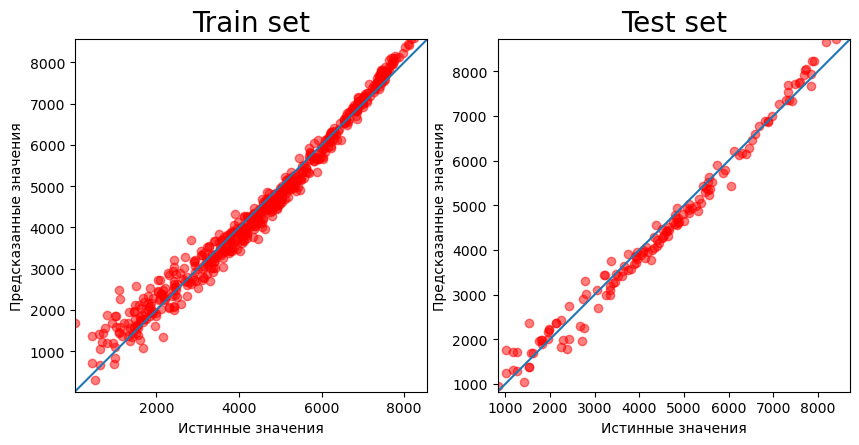

In [48]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
#Что хотим увидеть
from sklearn.linear_model import LinearRegression # подгрузили модель

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

y_pred_test = model_regression.predict(X_test)
y_pred_train = model_regression.predict(X_train)
print(print_metrics(y_test,y_pred_test))
print(print_metrics(y_train,y_pred_train))

plot_yreal_ypred(y_test, y_train, y_pred_test, y_pred_train)

__д) [10 баллов]__ Какими получились значения перед коэффициентами у вашей модели?  Как думаете, почему такое произошло? 

__Ответ:__  Значения не близки к нулю. 

In [49]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
model_regression.coef_

array([ 2.28984903e+02, -4.10985890e+01,  1.77408785e+01,  6.10008312e+00,
        2.72690347e+00,  3.24617544e+02,  5.56724438e+02,  7.20212744e+02,
        4.21632496e+02, -1.63872864e+02,  9.43242913e+01, -6.49313760e+01,
       -8.18322475e+02,  4.05707123e+01,  3.50378144e+01, -1.17677371e+02,
       -2.45356845e+01, -1.74459061e+02, -3.00709776e+02, -3.66473174e+02,
       -3.33780329e+02, -3.96427916e+02, -2.55511132e+02, -1.67562643e+02,
       -2.19222551e+01, -6.66564234e+00, -2.48277150e+01, -2.08828731e+01,
        4.74991325e+00,  6.20657505e+01,  7.95381712e-05, -4.34006194e+00,
        6.99901076e-01, -2.03397675e-01, -7.73669481e-01, -1.54605474e-01,
       -5.35894233e-01])

## 3. Lasso-регрессия

__a) Обучим Lasso-регрессию. В качестве силы регуляризации возьмем $\alpha = 40$.__


In [50]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
from sklearn.linear_model import Lasso

model = Lasso(alpha=40)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(print_metrics(y_test,y_pred))
print(print_metrics(y_train,y_train_pred))

print(model.coef_)

RMSE: 341.1666
None
RMSE: 370.6357
None
[ 9.56980918e+01  4.33189084e+01  2.40764100e+01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  9.48668686e-05 -2.02797802e+00
 -5.68797736e-01 -2.52495411e-01 -4.91373216e-01 -0.00000000e+00
 -8.00028404e-01]


/Users/kristina_euoew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.398e+07, tolerance: 2.193e+05
  model = cd_fast.enet_coordinate_descent(


__Ответ:__  Качество прогноза ухудшилось, RMSE возросло

Коэффициенты стали близки к нулю

__б) 

В случае линейных моделей, обычно, используют два вида регуляризации: Ridge и Lasso. Первая прибавляет к MSE квадраты коэффицентов, а вторая модули. Давайте посмотрим какая между ними разница.

In [51]:
from sklearn.linear_model import Lasso, Ridge  # подгружаем модели

Обучим много-много моделей с разными силами регуляризации $\alpha$ и посмотрим что получится.

In [52]:
alphas = np.arange(1, 100, 2)   # задали диапазон для силы регуляризатора

# матрицы для весов перед коэффициентами (число регрессоров)*(число признаков)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alph in alphas:
    rg = Ridge(alpha=alph)  # для каждого alph обучаем модель
    ls = Lasso(alpha=alph)
    rg.fit(X,y)
    ls.fit(X,y)
    coefs_ridge[i] = rg.coef_  # и запоминаем коэффициенты
    coefs_lasso[i] = ls.coef_
    i += 1

AttributeError: 'list' object has no attribute 'shape'

В отличие от L2-регуляризации (Ridge), L1 (Lasso) обнуляет веса при некоторых признаках. Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$ (в лекции коэффициент при регуляризаторе мог быть обозначен другой буквой).

In [ ]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

Картинки вышли красивыми. Обратите внимание, что регуляризатор Lasso агрессивнее уменьшает веса. Подумайте с чем это связано. Если делать `alpha` очень большим, веса зануляются. В случае Ridge такого не происходит. Веса становятся всё ближе к нулю, но зануления не происходит.  Из-за того, что Lasso зануляет некоторые признаки, его можно использовать для отбора самых важных признаков. Дальше будем работать именно с ним. 

Итак, мы видим, что при изменении `alpha` модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее `alpha`. Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть MSE (Mean Square Error).

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую, то настроимся на конкретные "новые" данные, и вновь можем переобучиться. 

Именно такую настройку вы наблюдали выше, когда запускали код с наивным прогнозом много раз подряд. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения `alpha`, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку. 

Подбирать параметр `alpha` в `sklearn` совсем просто: для этого есть `GridSearchCV`. Мы уже сталкивались с примером применения этой функции на семинаре. Попробуйте с помощью неё перебрать список из альф и подыскать оптимальное. Параметр cv отвечает за то, на сколько частей делится выборка. Поставьте `cv=5`. Также укажите параметр `scoring = neg_mean_squared_error`. Это задаст функцию потерь, на которую будет ориентироваться `GridSearchCV` при переборе. Назовите переменную, в которой будет находиться перебор __grid_cv_lasso.__

__в) Подберем для Lasso-регрессии с помощью поиска по решётке оптимальное значение $\alpha$.__
 

In [54]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

X_train = pd.DataFrame(X_train)
numeric_data = X_train.select_dtypes([np.number])

numeric_features = numeric_data.columns


from sklearn.preprocessing import StandardScaler

# Дальше мы работаем только с числовыми признаки
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train[numeric_features])
X_test_scaled = scaler_x.transform(X_test[numeric_features])



from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(
    Ridge(), [{"alpha": alphas}], 
    scoring="neg_root_mean_squared_error", cv=10
)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)


Best alpha = 0.3793


__г) Качество прогноза для модели с оптимальным значением $\alpha$  улучшилось!!!__

In [58]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
# will the code be with you
from sklearn.linear_model import Lasso

model_best = Lasso(alpha=0.3793)

model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)
y_train_pred = model_best.predict(X_train)

print(print_metrics(y_test,y_pred))
print(print_metrics(y_train,y_train_pred))


RMSE: 266.9301
None
RMSE: 302.3232
None


/Users/kristina_euoew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.761e+07, tolerance: 2.193e+05
  model = cd_fast.enet_coordinate_descent(
